In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.externals import joblib

In [2]:
# Feature description

feature_names = ['qPFJetPt', 'qPFJetEta', 'qPFJetPhi', 'qPFJet0Pt', 'qPFJet1Pt', 'qPFJet2Pt', 'qPFJet3Pt', 'qPFJet4Pt', 'qPFJet5Pt', 'qPFJet0Eta', 'qPFJet1Eta', 'qPFJet2Eta', 'qPFJet3Eta', 'qPFJet4Eta', 'qPFJet5Eta', 'qPFJet0Phi', 'qPFJet1Phi', 'qPFJet2Phi', 'qPFJet3Phi', 'qPFJet4Phi', 'qPFJet5Phi', 'qPFJet4CHS0Pt', 'qPFJet4CHS1Pt', 'qPFJet4CHS2Pt', 'qPFJet4CHS3Pt', 'qPFJet4CHS4Pt', 'qPFJet4CHS5Pt', 'qPFJet4CHS0Eta', 'qPFJet4CHS1Eta', 'qPFJet4CHS2Eta', 'qPFJet4CHS3Eta', 'qPFJet4CHS4Eta', 'qPFJet4CHS5Eta', 'qPFJet4CHS0Phi', 'qPFJet4CHS1Phi', 'qPFJet4CHS2Phi', 'qPFJet4CHS3Phi', 'qPFJet4CHS4Phi', 'qPFJet4CHS5Phi', 'qPFJet8CHS0Pt', 'qPFJet8CHS1Pt', 'qPFJet8CHS2Pt', 'qPFJet8CHS3Pt', 'qPFJet8CHS4Pt', 'qPFJet8CHS5Pt', 'qPFJet8CHS0Eta', 'qPFJet8CHS1Eta', 'qPFJet8CHS2Eta', 'qPFJet8CHS3Eta', 'qPFJet8CHS4Eta', 'qPFJet8CHS5Eta', 'qPFJet8CHS0Phi', 'qPFJet8CHS1Phi', 'qPFJet8CHS2Phi', 'qPFJet8CHS3Phi', 'qPFJet8CHS4Phi', 'qPFJet8CHS5Phi', 'qPFJetEI0Pt', 'qPFJetEI1Pt', 'qPFJetEI2Pt', 'qPFJetEI3Pt', 'qPFJetEI4Pt', 'qPFJetEI5Pt', 'qPFJetEI0Eta', 'qPFJetEI1Eta', 'qPFJetEI2Eta', 'qPFJetEI3Eta', 'qPFJetEI4Eta', 'qPFJetEI5Eta', 'qPFJetEI0Phi', 'qPFJetEI1Phi', 'qPFJetEI2Phi', 'qPFJetEI3Phi', 'qPFJetEI4Phi', 'qPFJetEI5Phi', 'qPFJet8CHSSD0Pt', 'qPFJet8CHSSD1Pt', 'qPFJet8CHSSD2Pt', 'qPFJet8CHSSD3Pt', 'qPFJet8CHSSD4Pt', 'qPFJet8CHSSD5Pt', 'qPFJet8CHSSD0Eta', 'qPFJet8CHSSD1Eta', 'qPFJet8CHSSD2Eta', 'qPFJet8CHSSD3Eta', 'qPFJet8CHSSD4Eta', 'qPFJet8CHSSD5Eta', 'qPFJet8CHSSD0Phi', 'qPFJet8CHSSD1Phi', 'qPFJet8CHSSD2Phi', 'qPFJet8CHSSD3Phi', 'qPFJet8CHSSD4Phi', 'qPFJet8CHSSD5Phi', 'qPFJetTopCHS0Pt', 'qPFJetTopCHS1Pt', 'qPFJetTopCHS2Pt', 'qPFJetTopCHS3Pt', 'qPFJetTopCHS4Pt', 'qPFJetTopCHS5Pt', 'qPFJetTopCHS0Eta', 'qPFJetTopCHS1Eta', 'qPFJetTopCHS2Eta', 'qPFJetTopCHS3Eta', 'qPFJetTopCHS4Eta', 'qPFJetTopCHS5Eta', 'qPFJetTopCHS0Phi', 'qPFJetTopCHS1Phi', 'qPFJetTopCHS2Phi', 'qPFJetTopCHS3Phi', 'qPFJetTopCHS4Phi', 'qPFJetTopCHS5Phi', 'qCalJet0Pt', 'qCalJet1Pt', 'qCalJet2Pt', 'qCalJet3Pt', 'qCalJet4Pt', 'qCalJet5Pt', 'qCalJet0Eta', 'qCalJet1Eta', 'qCalJet2Eta', 'qCalJet3Eta', 'qCalJet4Eta', 'qCalJet5Eta', 'qCalJet0Phi', 'qCalJet1Phi', 'qCalJet2Phi', 'qCalJet3Phi', 'qCalJet4Phi', 'qCalJet5Phi', 'qCalJet0En', 'qCalJet1En', 'qCalJet2En', 'qCalJet3En', 'qCalJet4En', 'qCalJet5En', 'qPho0Pt', 'qPho1Pt', 'qPho2Pt', 'qPho3Pt', 'qPho4Pt', 'qPho5Pt', 'qPho0Eta', 'qPho1Eta', 'qPho2Eta', 'qPho3Eta', 'qPho4Eta', 'qPho5Eta', 'qPho0Phi', 'qPho1Phi', 'qPho2Phi', 'qPho3Phi', 'qPho4Phi', 'qPho5Phi', 'qPho0En', 'qPho1En', 'qPho2En', 'qPho3En', 'qPho4En', 'qPho5En', 'qgedPho0Pt', 'qgedPho1Pt', 'qgedPho2Pt', 'qgedPho3Pt', 'qgedPho4Pt', 'qgedPho5Pt', 'qgedPho0Eta', 'qgedPho1Eta', 'qgedPho2Eta', 'qgedPho3Eta', 'qgedPho4Eta', 'qgedPho5Eta', 'qgedPho0Phi', 'qgedPho1Phi', 'qgedPho2Phi', 'qgedPho3Phi', 'qgedPho4Phi', 'qgedPho5Phi', 'qgedPho0En', 'qgedPho1En', 'qgedPho2En', 'qgedPho3En', 'qgedPho4En', 'qgedPho5En', 'qMu0Pt', 'qMu1Pt', 'qMu2Pt', 'qMu3Pt', 'qMu4Pt', 'qMu5Pt', 'qMu0Eta', 'qMu1Eta', 'qMu2Eta', 'qMu3Eta', 'qMu4Eta', 'qMu5Eta', 'qMu0Phi', 'qMu1Phi', 'qMu2Phi', 'qMu3Phi', 'qMu4Phi', 'qMu5Phi', 'qMu0En', 'qMu1En', 'qMu2En', 'qMu3En', 'qMu4En', 'qMu5En', 'qMuCosm0Pt', 'qMuCosm1Pt', 'qMuCosm2Pt', 'qMuCosm3Pt', 'qMuCosm4Pt', 'qMuCosm5Pt', 'qMuCosm0Eta', 'qMuCosm1Eta', 'qMuCosm2Eta', 'qMuCosm3Eta', 'qMuCosm4Eta', 'qMuCosm5Eta', 'qMuCosm0Phi', 'qMuCosm1Phi', 'qMuCosm2Phi', 'qMuCosm3Phi', 'qMuCosm4Phi', 'qMuCosm5Phi', 'qMuCosm0En', 'qMuCosm1En', 'qMuCosm2En', 'qMuCosm3En', 'qMuCosm4En', 'qMuCosm5En', 'qMuCosmLeg0Pt', 'qMuCosmLeg1Pt', 'qMuCosmLeg2Pt', 'qMuCosmLeg3Pt', 'qMuCosmLeg4Pt', 'qMuCosmLeg5Pt', 'qMuCosmLeg0Eta', 'qMuCosmLeg1Eta', 'qMuCosmLeg2Eta', 'qMuCosmLeg3Eta', 'qMuCosmLeg4Eta', 'qMuCosmLeg5Eta', 'qMuCosmLeg0Phi', 'qMuCosmLeg1Phi', 'qMuCosmLeg2Phi', 'qMuCosmLeg3Phi', 'qMuCosmLeg4Phi', 'qMuCosmLeg5Phi', 'qMuCosmLeg0En', 'qMuCosmLeg1En', 'qMuCosmLeg2En', 'qMuCosmLeg3En', 'qMuCosmLeg4En', 'qMuCosmLeg5En', 'qPFJet4CHSPt', 'qPFJet4CHSEta', 'qPFJet4CHSPhi', 'qPFJet8CHSPt', 'qPFJet8CHSEta', 'qPFJet8CHSPhi', 'qPFJetEIPt', 'qPFJetEIEta', 'qPFJetEIPhi', 'qPFJet8CHSSDPt', 'qPFJet8CHSSDEta', 'qPFJet8CHSSDPhi', 'qPFJetTopCHSPt', 'qPFJetTopCHSEta', 'qPFJetTopCHSPhi', 'qPFChMetPt', 'qPFChMetPhi', 'qPFMetPt', 'qPFMetPhi', 'qNVtx', 'qCalJetPt', 'qCalJetEta', 'qCalJetPhi', 'qCalJetEn', 'qCalMETPt', 'qCalMETPhi', 'qCalMETEn', 'qCalMETBEPt', 'qCalMETBEPhi', 'qCalMETBEEn', 'qCalMETBEFOPt', 'qCalMETBEFOPhi', 'qCalMETBEFOEn', 'qCalMETMPt', 'qCalMETMPhi', 'qCalMETMEn', 'qSCEn', 'qSCEta', 'qSCPhi', 'qSCEtaWidth', 'qSCPhiWidth', 'qSCEnhfEM', 'qSCEtahfEM', 'qSCPhihfEM', 'qSCEn5x5', 'qSCEta5x5', 'qSCPhi5x5', 'qSCEtaWidth5x5', 'qSCPhiWidth5x5', 'qCCEn', 'qCCEta', 'qCCPhi', 'qCCEn5x5', 'qCCEta5x5', 'qCCPhi5x5', 'qPhoPt', 'qPhoEta', 'qPhoPhi', 'qPhoEn_', 'qPhoe1x5_', 'qPhoe2x5_', 'qPhoe3x3_', 'qPhoe5x5_', 'qPhomaxenxtal_', 'qPhosigmaeta_', 'qPhosigmaIeta_', 'qPhor1x5_', 'qPhor2x5_', 'qPhor9_', 'qgedPhoPt', 'qgedPhoEta', 'qgedPhoPhi', 'qgedPhoEn_', 'qgedPhoe1x5_', 'qgedPhoe2x5_', 'qgedPhoe3x3_', 'qgedPhoe5x5_', 'qgedPhomaxenxtal_', 'qgedPhosigmaeta_', 'qgedPhosigmaIeta_', 'qgedPhor1x5_', 'qgedPhor2x5_', 'qgedPhor9_', 'qMuPt', 'qMuEta', 'qMuPhi', 'qMuEn_', 'qMuCh_', 'qMuChi2_', 'qMuCosmPt', 'qMuCosmEta', 'qMuCosmPhi', 'qMuCosmEn_', 'qMuCosmCh_', 'qMuCosmChi2_', 'qMuCosmLegPt', 'qMuCosmLegEta', 'qMuCosmLegPhi', 'qMuCosmLegEn_', 'qMuCosmLegCh_', 'qMuCosmLegChi2_', 'qSigmaIEta', 'qSigmaIPhi', 'qr9', 'qHadOEm', 'qdrSumPt', 'qdrSumEt', 'qeSCOP', 'qecEn', 'qUNSigmaIEta', 'qUNSigmaIPhi', 'qUNr9', 'qUNHadOEm', 'qUNdrSumPt', 'qUNdrSumEt', 'qUNeSCOP', 'qUNecEn', 'qEBenergy', 'qEBtime', 'qEBchi2', 'qEBiEta', 'qEBiPhi', 'qEEenergy', 'qEEtime', 'qEEchi2', 'qEEix', 'qEEiy', 'qESenergy', 'qEStime', 'qESix', 'qESiy', 'qHBHEenergy', 'qHBHEtime', 'qHBHEauxe', 'qHBHEieta', 'qHBHEiphi', 'qHFenergy', 'qHFtime', 'qHFieta', 'qHFiphi', 'qPreShEn', 'qPreShEta', 'qPreShPhi', 'qPreShYEn', 'qPreShYEta', 'qPreShYPhi']

feature_positions = ["MEAN", "RMS", "Q1", "Q2", "Q3", "Q4", "Q5"]

print("Number of feature vectors: %d" % len(feature_names))

Number of feature vectors: 401


In [3]:
model = joblib.load("random_forest.model")

In [4]:
importances = model.feature_importances_

In [5]:
indices = np.argsort(importances)[::-1]

Importance threshold: 0.990000
Total importance: 0.990004
Number of features: 945
Parameter importance: [194, 185, 47, 134, 137, 185, 63]


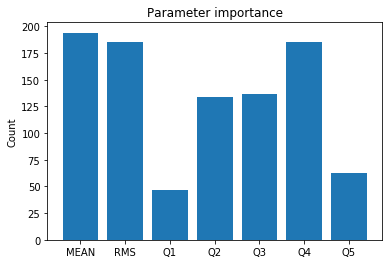

--------------------------------------------------------------------------------
Importance threshold: 0.999000
Total importance: 0.999006
Number of features: 1335
Parameter importance: [240, 263, 124, 181, 174, 216, 137]


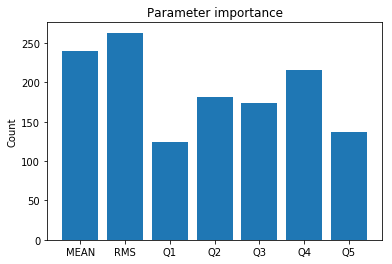

--------------------------------------------------------------------------------


In [6]:
# For curiosity only - plot and print importance scores at these thresholds
importance_thresholds = [0.99, 0.999, 1]

features_total = 2807

importance_total = 0
importance_y = []

# indices of zero importance features
parameters_zero = [0] * 7
features_zero = []
features_non_zero = []

# Each top-level feature is made of 7 parameters (MEAN, RMS, Q1, Q2, Q3, Q4, Q5)
# Idea is to find out which of these 7 parameters turns out to be most important
parameter_importances = [0] * 7

for f in range(features_total):
    indice = indices[f]
    importance = importances[indice]
    i, r = divmod(indice, 7)
    
    if importance == 0.0:
        parameters_zero[r] += 1
        features_zero.append(
            {"index": indice,
             "name": feature_names[i], 
             "position": feature_positions[r]
            }
        )
    else:
        importance_total += importance
        parameter_importances[r] += 1
        
        features_non_zero.append(
            {"index": indice,
             "name": feature_names[i],
             "position": feature_positions[r],
             "importance": importance
            }
        )
        
    # Integrated importance used for plotting
    importance_y.append(importance_total)
    
    if importance_thresholds:
        
        if importance_total < importance_thresholds[0]:
            continue
        else:
            print("Importance threshold: %f" % importance_thresholds[0])
            del importance_thresholds[0]
            
        print("Total importance: %f" % importance_total)
        print("Number of features: %d" % (f + 1))
        print("Parameter importance: %s" % parameter_importances)

        plt.figure()
        plt.bar(np.arange(7), parameter_importances)
        plt.xticks(np.arange(7), ("MEAN", "RMS", "Q1", "Q2", "Q3", "Q4", "Q5"))
        plt.title("Parameter importance")
        plt.ylabel("Count")
        plt.show()
            
        print("-"*80)       


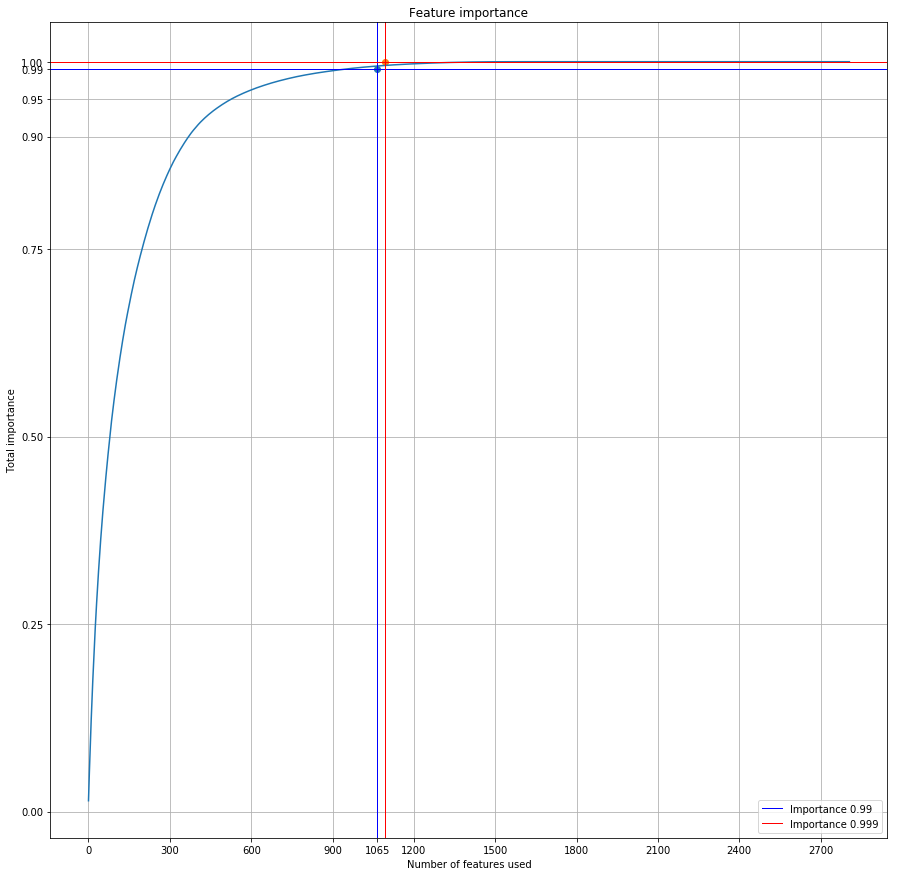

In [7]:
plt.figure(figsize=(15,15))
plt.grid()
plt.plot(np.arange(features_total), importance_y)

# importance 0.99
plt.scatter(1065, 0.99, marker="o")
plt.axhline(y=0.99, color='b', linestyle='-', linewidth=1, label="Importance 0.99")
plt.axvline(x=1065, color='b', linestyle='-', linewidth=1)

plt.scatter(1092, 0.999, marker="o")
plt.axhline(y=0.999, color='r', linestyle='-', linewidth=1, label="Importance 0.999")
plt.axvline(x=1092, color='r', linestyle='-', linewidth=1)

plt.title("Feature importance")
plt.ylabel("Total importance")
plt.xlabel("Number of features used")
plt.yticks([0,0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1])
xticks = np.append(np.arange(0, features_total, 300), [1065])
plt.xticks(xticks)
plt.legend(loc="lower right")
plt.show()

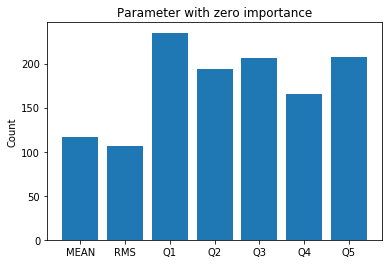

In [8]:
plt.figure()
plt.bar(np.arange(7), parameters_zero)
plt.xticks(np.arange(7), ("MEAN", "RMS", "Q1", "Q2", "Q3", "Q4", "Q5"))
plt.title("Parameter with zero importance")
plt.ylabel("Count")
plt.show()

# Zero importance

In [9]:
print("Number of features with zero importance %d" % len(features_zero))

Number of features with zero importance 1232


In [10]:
with pd.option_context('display.max_rows', None):
    print(pd.DataFrame(features_zero))

      index               name position
0       501       qPFJetEI2Phi       Q3
1      2225          qPhoe5x5_       Q5
2      2785          qPreShPhi       Q5
3      2226     qPhomaxenxtal_     MEAN
4      2227     qPhomaxenxtal_      RMS
5      2215          qPhoe3x3_       Q2
6       496       qPFJetEI1Phi       Q5
7       499       qPFJetEI2Phi       Q1
8       498       qPFJetEI2Phi      RMS
9      2223          qPhoe5x5_       Q3
10     2067        qSCPhiWidth       Q1
11      497       qPFJetEI2Phi     MEAN
12     2221          qPhoe5x5_       Q1
13      486       qPFJetEI0Phi       Q2
14     2218          qPhoe3x3_       Q5
15      494       qPFJetEI1Phi       Q3
16      488       qPFJetEI0Phi       Q4
17      489       qPFJetEI0Phi       Q5
18      491       qPFJetEI1Phi      RMS
19      492       qPFJetEI1Phi       Q1
20      493       qPFJetEI1Phi       Q2
21      495       qPFJetEI1Phi       Q4
22     2053             qSCPhi       Q1
23     2229     qPhomaxenxtal_       Q2


# Non zero importance

In [11]:
with pd.option_context('display.max_rows', None):
    print(pd.DataFrame(features_non_zero))

        importance  index               name position
0     1.455785e-02   2324  qgedPhomaxenxtal_     MEAN
1     1.296517e-02   2331   qgedPhosigmaeta_     MEAN
2     1.144065e-02    988           qPho0Eta      RMS
3     1.106592e-02   2303       qgedPhoe2x5_     MEAN
4     1.102198e-02   2615            qEBtime       Q3
5     1.077519e-02   1160        qgedPho0Eta       Q4
6     1.068316e-02   2037              qSCEn     MEAN
7     1.037972e-02   1904           qPFMetPt     MEAN
8     1.036167e-02   2614            qEBtime       Q2
9     9.848305e-03   2042              qSCEn       Q4
10    9.699714e-03   2062        qSCEtaWidth       Q3
11    9.553686e-03   1958          qCalMETPt       Q4
12    9.336382e-03    165      qPFJet4CHS2Pt       Q3
13    9.016599e-03   2289         qgedPhoEn_     MEAN
14    8.640755e-03   1810       qPFJet8CHSPt       Q3
15    8.614925e-03    579   qPFJet8CHSSD1Eta       Q4
16    8.270610e-03    409        qPFJetEI1Pt       Q2
17    8.001305e-03    417   